#  COSE474-2024F: Deep Learing HW1
*Name: Aidira Puti Nabilla*



*Student ID: 2024962097*


0.1 Installation

## 2.1 Data manipulation

In [ ]:
import torch
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
x.numel()

12

In [ ]:
x.shape

torch.Size([12])

In [ ]:
X = x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [ ]:
torch.randn(3, 4)

tensor([[-0.6070, -2.5399,  0.5286, -0.5462],
        [ 0.2453,  0.9906, -0.8443,  1.5581],
        [ 0.3372, -0.3968, -0.3314,  0.1214]])

In [ ]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [ ]:
X[1, 2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [ ]:
torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

In [ ]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [ ]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
X.sum()

tensor(66.)

In [ ]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [ ]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [ ]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [ ]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 135979670051856
id(Z): 135979670051856


In [ ]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

In [ ]:
X < Y

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [ ]:
X > Y

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

**Takeaways:**
- Reshape functions returns a tensor. When possible, the returned tensor will be a view of input. Otherwise, it will be a copy.
- The later index of tensor slicing is exclusive
- Any operations between 2 tensor result in tensor
- torch.cat((X, Y), dim=0) —> concatinate the first dimension, torch.cat((X, Y), dim=1) —> concatinate the second dimension
- Broadcasting works according to the following two-step procedure:
    - (i) expand one or both arrays by copying elements along axes with length 1 so that after this transformation, the two tensors have the same shape;
    - (ii) perform an elementwise operation on the resulting arrays
- Use slice notation [:] or += to perform in-place operations


## 2.2 Data Preprocessing

In [ ]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [ ]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


In [ ]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [ ]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


In [ ]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

**Takeaways:**
- Empty value or NA (missing value) from CSV will be representes as NaN by pandas
- Common heuristic to handle missing value:
    - Categorical field: treat NaN as new category
    - Numerical field: replace NaN with mean
- Data processing can get complex, especially with multiple data sources and varied data types like text and images.
- Efficient tools and algorithms are needed to handle complex datasets and avoid bottlenecks in machine learning.
- Ensuring data quality is essential, and visualization tools can help detect issues like outliers and errors.

## 2.3. Linear Algebra

In [ ]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

In [ ]:
x = torch.arange(3)
x

tensor([0, 1, 2])

In [ ]:
x[2]

tensor(2)

In [ ]:
len(x)

3

In [ ]:
x.shape

torch.Size([3])

In [ ]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [ ]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [ ]:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [ ]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [ ]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [ ]:
A * B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [ ]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [ ]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [ ]:
A.shape, A.sum()

(torch.Size([2, 3]), tensor(15.))

In [ ]:
A.shape, A.sum(axis=0).shape

(torch.Size([2, 3]), torch.Size([3]))

In [ ]:
A.shape, A.sum(axis=1).shape

(torch.Size([2, 3]), torch.Size([2]))

In [ ]:
A.sum(axis=[0, 1]) == A.sum()

tensor(True)

In [ ]:
A.mean(), A.sum() / A.numel()

(tensor(2.5000), tensor(2.5000))

In [ ]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

In [ ]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [ ]:
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [ ]:
A.cumsum(axis=0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

In [ ]:
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [ ]:
torch.sum(x * y)

tensor(3.)

In [ ]:
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

In [ ]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

In [ ]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [ ]:
torch.abs(u).sum()

tensor(7.)

In [ ]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

In [ ]:
# EXERCISE
# Prove that the transpose of the transpose of a matrix is the matrix itself
A = torch.randn(3, 4)
assert torch.equal(A.T.T, A), "Transpose of transpose is not equal to the matrix!"
print("Transpose of transpose equals the matrix itself.")


# Given two matrices A and B, show that sum and transposition commute:
A = torch.randn(3, 4)
B = torch.randn(3, 4)
assert torch.equal(A.T + B.T, (A + B).T), "Sum and transposition do not commute!"
print("Sum and transposition commute.")

# Given any square matrix Am ia A + AT always symmetric? Can you prove the result by using only the results of the previous two exercises?
A = torch.randn(4, 4)
is_symmetric = torch.equal(A + A.T, (A + A.T).T)
print(f"Is A + A^T symmetric? {is_symmetric}")

# What is the output of len(X) for a tensor 𝑋 of shape (2, 3, 4)?
X = torch.randn(2, 3, 4)
print(len(X))

# For a tensor 𝑋 of arbitrary shape, does len(X) always correspond to the length of a certain axis?
# yes, first axis

# Run A / A.sum(axis=1) and analyze the results.
A = torch.randn(3, 4)
result = A / A.sum(axis=1, keepdim=True)
print(result)

# Manhattan Distance: Can you travel diagonally?
# No, The distance between two points is the sum of the absolute differences in the x and y coordinates.
def manhattan_distance(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)

print(manhattan_distance(1, 2, 3, 4))

# Consider a tensor of shape (2, 3, 4). What are the shapes of the summation outputs along axes 0, 1, and 2?
X = torch.randn(2, 3, 4)

print(X.sum(axis=0).shape)
print(X.sum(axis=1).shape)
print(X.sum(axis=2).shape)

# Feed a tensor with three or more axes to linalg.norm. What does it compute?
X = torch.randn(2, 3, 4)
norm_value = torch.linalg.norm(X)
print(norm_value) # --> Frobenius norm

# Matrix Multiplication: 𝐴 ∈ 𝑅^210×216, 𝐵 ∈ 𝑅^216×25, 𝐶 ∈ 𝑅^25×214
A = torch.randn(210, 216)
B = torch.randn(216, 25)
C = torch.randn(25, 214)

result1 = torch.matmul(torch.matmul(A, B), C)
result2 = torch.matmul(A, torch.matmul(B, C))

print(result1.shape, result2.shape) # --> The order of matrix multiplication affects performance due to intermediate matrix sizes.

# Multiplication speed comparison between 𝐴𝐵 and 𝐴𝐶.⊤
A = torch.randn(210, 216)
B = torch.randn(216, 25)
C = torch.randn(25, 216)

result1 = torch.matmul(A, B)
result2 = torch.matmul(A, C.T)

print(result1.shape, result2.shape)

# Stack matrices 𝐴, 𝐵, 𝐶 ∈ 𝑅^100×200
A = torch.randn(100, 200)
B = torch.randn(100, 200)
C = torch.randn(100, 200)

tensor_stack = torch.stack([A, B, C], dim=0)
print(tensor_stack.shape)

B_recovered = tensor_stack[1]
print(torch.equal(B, B_recovered))

Transpose of transpose equals the matrix itself.
Sum and transposition commute.
Is A + A^T symmetric? True
2
tensor([[ 0.3652,  0.8681, -0.2314, -0.0018],
        [ 0.0834, -0.0204,  0.2743,  0.6626],
        [ 0.0400,  0.2719,  0.2220,  0.4661]])
4
torch.Size([3, 4])
torch.Size([2, 4])
torch.Size([2, 3])
tensor(4.3452)
torch.Size([210, 214]) torch.Size([210, 214])
torch.Size([210, 25]) torch.Size([210, 25])
torch.Size([3, 100, 200])
True


**Takeaways:**
- Scalar = tensor with one element, usually represented by lower case variable
- Vectors = 1st order tensors
- Matrix = 2nd order tensors, usually represented by capital letter
- Tensors = higher-order tensors
- Image —> 3rd order tensors (height, width, and channel)
- Elementwise operations produce outputs that have the same shape as their operands
- Elementwise product of two matrices is called their Hadamard product.
- Compared to Hadamard products, matrix–matrix products take considerably longer to compute (cubic rather than quadratic time).
- Adding or multiplying a scalar and a tensor produces a result with the same shape as the original tensor.
- torch.dot == torch.sum(x * y)
- torch.mv = matrix–vector products
- torch.mm = matrix-matrix products
- @ can execute both matrix–vector and matrix–matrix products
- torch.norm = l2 norm = euclidean distance = square roots of the sum of squares
- torch.abs(u).sum() = l1 norm = manhattan distance = sums the absolute values of a vector’s elements (l1 less sensitive to outliers than l2)
- torch.norm(torch.ones((4, 9))) = frobenius norm
- Norms capture various notions of the magnitude of a vector (or matrix), and are commonly applied to the difference of two vectors to measure their distance apart.

## 2.5 Automatic Differentiation

In [ ]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [ ]:
x.requires_grad_(True)
x.grad

In [ ]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [ ]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [ ]:
x.grad == 4 * x

tensor([True, True, True, True])

In [ ]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [ ]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))
x.grad

tensor([0., 2., 4., 6.])

In [ ]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [ ]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [ ]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [ ]:
a.grad == d / a

tensor(True)

First gradient: 6.0
Second gradient: 12.0
tensor([[-1.1335,  1.1384,  1.1204],
        [ 0.2264, -1.8370,  2.8746],
        [ 2.6610, -0.9981,  0.3656]])


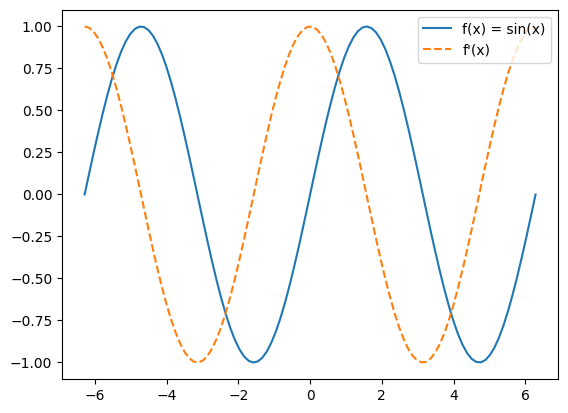

Gradient computed using backward differentiation: 0.08239537477493286
Gradient computed using forward differentiation: 0.08239541392249738


In [ ]:
# EXERCISE
# Why is the second derivative much more expensive to compute than the first derivative?
# Computing the second derivative requires applying automatic differentiation twice.

# After running the function for backpropagation, immediately run it again and see what happens. Investigate.
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2

y.backward(retain_graph=True) # --> Without retain_graph=True, the second backpropagation will raise an error.
print(f"First gradient: {x.grad}")

y.backward()
print(f"Second gradient: {x.grad}")

# In the control flow example where we calculate the derivative of `d` with respect to `a`, what would happen if we changed the variable `a` to a random vector or a matrix? At this point, the result of the calculation `f(a)` is no longer a scalar. What happens to the result? How do we analyze this?
a = torch.randn(3, 3, requires_grad=True)

f = a.pow(2).sum()
f.backward()

print(a.grad)

# Let $f(x) = \sin(x)$. Plot the graph of $f$ and of its derivative $f'$. Do not exploit the fact that $f'(x) = \cos(x)$ but rather use automatic differentiation to get the result.
import matplotlib.pyplot as plt
import numpy as np

x = torch.linspace(-2 * np.pi, 2 * np.pi, 100, requires_grad=True)
f = torch.sin(x)

f.backward(torch.ones_like(x))
f_prime = x.grad

x_np = x.detach().numpy()
f_np = f.detach().numpy()
f_prime_np = f_prime.detach().numpy()

plt.plot(x_np, f_np, label="f(x) = sin(x)")
plt.plot(x_np, f_prime_np, label="f'(x)", linestyle="--")
plt.legend()
plt.show()

# Let $f(x) = ((\log x^2) \cdot \sin x) + x^{-1}$. Write out a dependency graph tracing results from $x$ to $f(x)$.
'''
z1 = x^2
z2 = log(z1)
z3 = sin(x)
z4 = z2.z3
z5 = x^-1
f(x) = z4 + z5
'''

# Use the chain rule to compute the derivative $\frac{df}{dx}$ of the aforementioned function, placing each term on the dependency graph that you constructed previously.
'''
dz1/dx = 2x
dz2/dz1 = 1/z1 = 1/x^2
dz2/dx = 2/x
dz3/dx = cos(x)
dz4/dx = sin(x).2/x + log(x^2).cox(x)
dz5/dx = =x^-2
'''

# Given the graph and the intermediate derivative results, you have a number of options when computing the gradient. Evaluate the result once starting from $x$ to $f$ and once from $f$ tracing back to $x$. The path from $x$ to $f$ is commonly known as *forward differentiation*, whereas the path from $f$ to $x$ is known as backward differentiation.
# Backward differentiation (autograd):
x = torch.tensor(2.0, requires_grad=True)
f = (torch.log(x ** 2) * torch.sin(x)) + x.pow(-1)

f.backward()

print(f"Gradient computed using backward differentiation: {x.grad.item()}")

# Forward differentiation (manual):
import math

x_value = 2.0

z1 = x_value ** 2
z2 = math.log(z1)
z3 = math.sin(x_value)
z4 = z2 * z3
z5 = x_value ** (-1)

dz1_dx = 2 * x_value
dz2_dx = 2 / x_value
dz3_dx = math.cos(x_value)
dz4_dx = (dz2_dx * z3) + (z2 * dz3_dx)
dz5_dx = -x_value ** (-2)

df_dx = dz4_dx + dz5_dx

print(f"Gradient computed using forward differentiation: {df_dx}")

# When might you want to use forward, and when backward, differentiation? Hint: consider the amount of intermediate data needed, the ability to parallelize steps, and the size of matrices and vectors involved.
# Forward differentiation is generally more efficient when the number of inputs is much smaller than the number of outputs

**Takeaways:**
- The gradient of a scalar-valued function with respect to a vector x is vector-valued with the same shape as x
- Invoking backward on a non-scalar elicits an error unless we tell PyTorch how to reduce the object to a scalar.
- Use x.grad.zero_() to reset gradient
- u = y.detach() used to detach provenance, u is detached but y still presist
- (i) attach gradients to those variables with respect to which we desire derivatives; (ii) record the computation of the target value; (iii) execute the backpropagation function; and (iv) access the resulting gradient.

## Linear Regression

In [ ]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [ ]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [ ]:
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
f'{time.time() - t:.5f} sec'

'0.14039 sec'

In [ ]:
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00059 sec'

In [ ]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

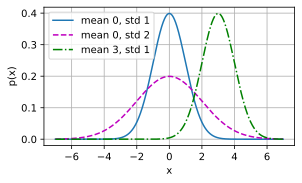

In [ ]:
x = np.arange(-7, 7, 0.01)

params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

In [ ]:
# EXERCISE

# Minimize sum of squared differences: ∑(x_i - b)^2
# Solution: Optimal b is the mean of the data, b = (1/n) * ∑ x_i
# Relation to normal distribution: This is equivalent to maximizing the likelihood of the data under a normal distribution.
# If we change the loss to ∑|x_i - b|: Optimal b is the median of the data.

# Affine functions: f(x) = x.T w + b
# This is equivalent to linear functions on (x, 1) because appending 1 to x and rewriting f gives a linear transformation.

# Quadratic function of x in a deep network:
# f(x) = b + ∑ w_i x_i + ∑ w_ij x_i x_j
# Can be formulated as two layers in a deep network, with the first layer computing linear terms, and the second layer computing the quadratic terms (x_i x_j).

# Design matrix X.T X does not have full rank:
# Problem: The linear system is underdetermined and cannot be solved uniquely.
# Solution: Adding small independent Gaussian noise to X entries regularizes the matrix.
# Expected value of X.T X when noise is added: The noise increases rank by making the matrix invertible.
# SGD when X.T X is not full rank: The gradient may get stuck in directions with zero variance.

# Exponential noise model for ε:
# Negative log-likelihood: -log P(y | X) = ∑|y_i - Xw| (L1 loss).
# Closed form solution: Median of residuals minimizes L1 loss.
# Minibatch SGD: Near the stationary point, gradients may become small, causing slow convergence. Adding momentum or using adaptive learning rates can help.

# Composing two linear layers in a neural network:
# Issue: The composition of two linear layers is still a linear transformation. Hence, this would reduce the expressive power of the network.
# Solution: Non-linearity between the layers is required for effective learning.

# Regression for house/stock price estimation:
# Additive Gaussian noise is inappropriate for prices as they cannot be negative. Price fluctuations are not Gaussian.
# Regression to log(price) is better because log prices account for relative changes (percentage differences).
# Pennystocks: Trading constraints at low prices make it difficult to model them effectively with Gaussian models. The Black-Scholes model deals with such complexities.

# Regression for apple sales:
# Problem with Gaussian noise: Sales counts are discrete and non-negative, while Gaussian noise assumes continuous values.
# Poisson distribution for counts: p(k | λ) = λ^k * exp(-λ) / k!
# λ is the expected value of k because E[k] = ∑ k * p(k | λ) = λ.
# Loss function for Poisson: L(λ) = -log p(k | λ) = λ - k * log(λ).
# Loss function for log λ: L(log λ) = λ - k * log(λ).


**Takeaways:**
- Regression problems pop up whenever we want to predict a numerical value.
- Linear regression assumptions: relationship between features x and target y is approximately linear, and any observable noise is well behaved, following a Gaussian distribution.
- The squared error is the most common loss function for linear regression, measuring the difference between predicted and actual values. The goal is to minimize this loss across the dataset by adjusting model parameters.
- Linear regression has an analytic solution when the design matrix is full rank, but in practice, models are optimized using methods like gradient descent or minibatch stochastic gradient descent, especially for deep learning models.
- Efficient model training involves vectorization, leveraging linear algebra libraries to perform operations on batches of data simultaneously, which significantly improves computation speed.

## 3.2 Object-Oriented Design for Implementation

In [ ]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def add_to_class(Class):
    '''Register functions as methods in created class.'''
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [ ]:
class A:
    def __init__(self):
        self.b = 1

a = A()

In [ ]:
@add_to_class(A)
def do(self):
    print('Class attribute "b" is', self.b)

a.do()

Class attribute "b" is 1


In [ ]:
class HyperParameters:
    '''The base class of hyperparameters'''
    def save_hyperparameters(self, ignore=[]):
        raise NotImplemented

In [ ]:
class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'])
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

self.a = 1 self.b = 2
There is no self.c = True


In [ ]:
class ProgressBoard(d2l.HyperParameters):
    '''The board that plots data points in animation.'''
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()

    def draw(self, x, y, label, every_n=1):
        raise NotImplemented

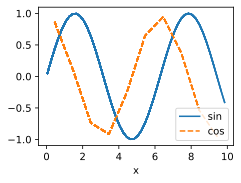

In [ ]:
board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)

In [ ]:
class Module(nn.Module, d2l.HyperParameters):
    '''The base class of models.'''
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()

    def loss(self, y_hat, y):
        raise NotImplementedError

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def plot(self, key, value, train):
        '''Plot a point in animation.'''
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

In [ ]:
class DataModule(d2l.HyperParameters):
    '''The base class of data.'''
    def __init__(self, root='../data', num_workers=4):
        self.save_hyperparameters()

    def get_dataloader(self, train):
        raise NotImplementedError

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

In [ ]:
class Trainer(d2l.HyperParameters):
    '''The base class for training models with data.'''
    def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus == 0, 'No GPU support yet'

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        raise NotImplementedError

In [ ]:
# EXERCISE
# Remove the save_hyperparameters statement in the B class. Can you still print self.a and self.b? Optional: if you have dived into the full implementation of the HyperParameters class, can you explain why?

class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

# save_hyperparameters used to
# - save the specified hyperparameters as instance variables.
# - provide a convenient way to exclude certain parameters (like c in your case) from being saved.


AttributeError: 'B' object has no attribute 'a'

**Takeaways:**
- Key Classes:
  - Module: Contains models, losses, and optimization methods. Serves as the base for all models, requiring methods for loss calculation, training, validation steps, and optimization configuration. Integrates with PyTorch’s nn.Module for easy neural network management.
  - DataModule: Manages data preparation, downloading, and preprocessing. Provides data loaders for training and validation.
  - Trainer: Combines Module and DataModule to train models on various hardware. Handles the training process, including data preparation, model fitting, and managing training epochs.

- Utilities:
  - Method Registration Utility: Allows adding methods to a class after its creation, enhancing modularity in Jupyter notebooks.
  - HyperParameters Class: Automatically saves constructor arguments as class attributes, facilitating easier class design.
  - ProgressBoard: A utility for interactive plotting of experiment progress.



## 3.4. Linear Regression Implementation from Scratch

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

In [ ]:
class LinearRegressionScratch(d2l.Module):
    '''The linear regression model implemented from scratch.'''
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

In [ ]:
@d2l.add_to_class(LinearRegressionScratch)
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

In [ ]:
@d2l.add_to_class(LinearRegressionScratch)
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

In [ ]:
class SGD(d2l.HyperParameters):
    '''Minibatch stochastic gradient descent.'''
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [ ]:
@d2l.add_to_class(LinearRegressionScratch)
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

In [ ]:
@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer)
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:  # To be discussed later
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

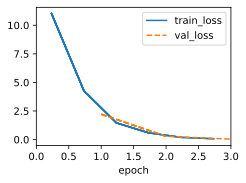

In [ ]:
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [ ]:
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.0943, -0.1581])
error in estimating b: tensor([0.1996])


Learned Resistance: 1.4590520858764648


<ipython-input-141-b2ac96159ae7>:66: RuntimeWarning: overflow encountered in exp
  return (2 * h * c**2) / (wavelength**5) * (np.exp(h * c / (wavelength * k * T)) - 1)**-1
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Estimated Temperature: 1.00 K


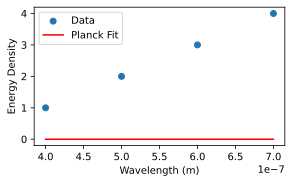

Final Loss with Learning Rate 0.001: 11.142329216003418
Final Loss with Learning Rate 0.01: 8.219460487365723
Final Loss with Learning Rate 0.1: 0.14031466841697693
Absolute Loss: 0.9000000953674316
Absolute Loss with Perturbation: 9997.900390625
Combined Loss: 1.0100001096725464
Predictions without shuffling: [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


In [ ]:
# EXERCISE

# What would happen if we initialized the weights to zero? Would the algorithm still work? What if we initialized the parameters with variance 1000 instead of 0.01?
import torch
import torch.nn as nn
import torch.optim as optim

# Initialize weights to zero
class LinearRegressionZeroWeights(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.zeros(2, 1))
        self.b = nn.Parameter(torch.zeros(1))

    def forward(self, X):
        return torch.matmul(X, self.w) + self.b
# --> Initializing weights to zero leads to symmetry, where all weights are updated equally. The model won't learn effectively.

# Initialize weights with high variance
class LinearRegressionHighVariance(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.normal(0, 1000, (2, 1)))
        self.b = nn.Parameter(torch.zeros(1))

    def forward(self, X):
        return torch.matmul(X, self.w) + self.b
# --> Initialize weights with high variance can cause exploding gradients, leading to unstable training.

# Can you use automatic differentiation to learn the parameters of your model relating voltage and current?
# Ohm's Law: V = I * R
class OhmModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.R = nn.Parameter(torch.randn(1))

    def forward(self, I):
        return I * self.R

I_data = torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5])
V_data = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])

# Training
model = OhmModel()
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

for epoch in range(100):
    optimizer.zero_grad()
    V_pred = model(I_data)
    loss = loss_fn(V_pred, V_data)
    loss.backward()
    optimizer.step()

print(f'Learned Resistance: {model.R.item()}')

# Can you use Planck's Law to determine the temperature of an object using spectral energy density?
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def plancks_law(wavelength, T):
    h = 6.626e-34  # Planck's constant
    c = 3.0e8      # Speed of light
    k = 1.38e-23   # Boltzmann constant
    return (2 * h * c**2) / (wavelength**5) * (np.exp(h * c / (wavelength * k * T)) - 1)**-1

wavelengths = np.array([400e-9, 500e-9, 600e-9, 700e-9])
energy_density = np.array([1.0, 2.0, 3.0, 4.0])

params, _ = curve_fit(plancks_law, wavelengths, energy_density)
temperature = params[0]

print(f'Estimated Temperature: {temperature:.2f} K')

# Plot
plt.scatter(wavelengths, energy_density, label='Data')
wavelength_fit = np.linspace(400e-9, 700e-9, 100)
plt.plot(wavelength_fit, plancks_law(wavelength_fit, temperature), label='Planck Fit', color='red')
plt.xlabel('Wavelength (m)')
plt.ylabel('Energy Density')
plt.legend()
plt.show()

# What problems might you encounter if you wanted to compute the second derivatives of the loss? How would you fix them?
'''
Issues with second derivatives:
- Computational cost increases significantly.
- Numerical instability can occur due to small gradients.

Fixes:
- Use methods like Hessian-vector products for efficiency.
- Implement regularization techniques.
'''

# Why is the reshape method needed in the loss function?
# To ensure that the predicted and true values have the same shape, for element-wise operations like subtraction in the loss function.

# Experiment with different learning rates to find how quickly the loss function value drops. Can you reduce the error by increasing the number of epochs of training?
learning_rates = [0.001, 0.01, 0.1]
for lr in learning_rates:
    model = OhmModel() # reset
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(100):
        optimizer.zero_grad()
        V_pred = model(I_data)
        loss = loss_fn(V_pred, V_data)
        loss.backward()
        optimizer.step()

    print(f'Final Loss with Learning Rate {lr}: {loss.item()}')

# If the number of examples cannot be divided by the batch size, what happens to data_iter at the end of an epoch?
# The last batch may be smaller --> inconsistency

# Try implementing a different loss function, such as the absolute value loss (y_hat - d2l.reshape(y, y_hat.shape)).abs().sum().
# Check what happens for regular data.
# Check whether there is a difference in behavior if you actively perturb some entries, such as y5 = 1000, of y.
# Can you think of a cheap solution for combining the best aspects of squared loss and absolute value loss? Hint: how can you avoid really large gradient values?

def absolute_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)).abs().sum()

# Example data
y_true = torch.tensor([1.0, 2.0, 3.0])
y_pred = torch.tensor([1.2, 1.8, 2.5])

loss_value = absolute_loss(y_pred, y_true)
print(f'Absolute Loss: {loss_value.item()}')

# Perturbing data
y_true_perturbed = torch.tensor([1.0, 2.0, 10000.0])
loss_value_perturbed = absolute_loss(y_pred, y_true_perturbed)
print(f'Absolute Loss with Perturbation: {loss_value_perturbed.item()}')

# Combined loss that mitigates large gradients
def combined_loss(y_hat, y):
    squared_loss = ((y_hat - y.reshape(y_hat.shape)) ** 2).mean()
    abs_loss = absolute_loss(y_hat, y)
    return squared_loss + abs_loss

# Usage
loss_combined = combined_loss(y_pred, y_true)
print(f'Combined Loss: {loss_combined.item()}')

# Why do we need to reshuffle the dataset? Can you design a case where a maliciously constructed dataset would break the optimization algorithm otherwise?
# To avid order bias, provide better generalization, and allows the model to escape local minimum more effectively --> smoother convergence.
# Case
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Simple dataset (maliciously constructed)
X = torch.tensor([[0], [0], [0],  # Class 0
                   [1], [1], [1]])  # Class 1
y = torch.tensor([0, 0, 0,  # Labels for Class 0
                  1, 1, 1])  # Labels for Class 1

# Simple model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(1, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

# Training function
def train_model(X, y, epochs=100):
    model = SimpleModel()
    optimizer = optim.SGD(model.parameters(), lr=0.1)
    loss_fn = nn.BCELoss()

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X.float())
        loss = loss_fn(outputs.squeeze(), y.float())
        loss.backward()
        optimizer.step()

    return model

# Train without shuffling
model_no_shuffle = train_model(X, y)

# Predictions
with torch.no_grad():
    predictions = model_no_shuffle(X.float()).round()
print("Predictions without shuffling:", predictions.numpy())

## 4.1. Softmax Regression

In [ ]:
# EXERCISE
import numpy as np

# Compute the second derivative of the cross-entropy loss for softmax
def softmax(o):
    exp_o = np.exp(o - np.max(o))
    return exp_o / np.sum(exp_o)

def cross_entropy_loss(y, y_hat):
    return -np.sum(y * np.log(y_hat + 1e-10))

# Derivative of softmax
def softmax_derivative(o):
    s = softmax(o)
    return np.diag(s) - np.outer(s, s)  # Hessian matrix (second derivative)

# Variance of the softmax distribution
def softmax_variance(o):
    s = softmax(o)
    return np.sum(s * (1 - s))  # Variance from softmax probabilities

# Test for three classes with equal probability
o = np.array([0.0, 0.0, 0.0])  # Equal logits
y_hat = softmax(o)
second_derivative = softmax_derivative(o)
variance = softmax_variance(o)

# Issues with binary coding for three classes
# Binary coding for three classes (0, 1, 2) requires more than 2 bits, leading to inefficiency.
# Better code: Use ternary representation for encoding, reducing bits needed.

# Ternary signal transmission
# Ternary units for integer range 0 to 7 (3 levels: -1, 0, 1)
# 2 ternary digits needed since 3^2 = 9 > 8 (0 to 7).
# Better for electronics as it reduces signal noise and improves energy efficiency.

# Proving softmax satisfies Bradley–Terry model requirements
def softmax_bradley_terry(o):
    s = softmax(o)
    return s

# Proving properties
def prove_softmax(o):
    assert np.all(softmax_bradley_terry(o) >= 0)
    assert np.argmax(o) == np.argmax(softmax_bradley_terry(o))

# Adding a default option
def softmax_with_default(o):
    o = np.append(o, 0)  # Adding default option (neither)
    return softmax(o)

# Proving RealSoftMax properties
def real_softmax(a, b):
    return np.log(np.exp(a) + np.exp(b))

# Proving RealSoftMax > max(a, b)
def prove_real_softmax(a, b):
    return real_softmax(a, b) > max(a, b)

# Small difference
def small_difference(a, b):
    b = 0
    return real_softmax(a, b) - a  # Small difference when a >= b

# Scaling properties
def scaled_real_softmax(a, b, lam):
    return (1/lam) * real_softmax(lam * a, lam * b)

# As lambda approaches infinity
def limit_scaled_real_softmax(a, b):
    return max(a, b)

# Constructing softmin function
def softmin(a, b):
    return -real_softmax(-a, -b)

# Extending softmin to more than two numbers
def softmin_multiple(*args):
    return -np.log(np.sum(np.exp(-np.array(args))))

# Proving convexity of log-partition function
def log_partition_function(x):
    return np.log(np.sum(np.exp(x)))

# Convexity proof using derivatives
def prove_convexity(x):
    first_derivative = softmax(x)
    second_derivative = np.sum(first_derivative * (1 - first_derivative))  # Variance
    return second_derivative >= 0  # Convexity condition

# Translation invariance
def translation_invariance(x, b):
    return log_partition_function(x + b) == log_partition_function(x)

# Numerical stability
def stable_log_partition(x):
    b = np.max(x)
    return log_partition_function(x - b)

# Distribution properties with temperature
def adjusted_distribution(P, alpha):
    return P ** alpha / np.sum(P ** alpha)  # Distribution Q

# Temperature effects
def temperature_effects(P, alpha):
    # Doubling temperature
    if alpha == 1:
        return adjusted_distribution(P, 0.5)
    # Halving temperature
    elif alpha == 0.5:
        return adjusted_distribution(P, 2)

# Temperature limits
def limit_temperature(P, T):
    if T == 0:
        return np.array([1 if i == np.argmax(P) else 0 for i in range(len(P))])  # deterministic
    elif T == float('inf'):
        return np.full_like(P, 1 / len(P))  # uniform distribution

# Example usage of functions:
o = np.array([1, 2, 3])  # Example logits
print("Softmax Output:", softmax(o))
print("Cross-Entropy Loss:", cross_entropy_loss(np.array([1, 0, 0]), softmax(o)))
print("Softmax Variance:", softmax_variance(o))


Softmax Output: [0.09003057 0.24472847 0.66524096]
Cross-Entropy Loss: 2.4076059633336464
Softmax Variance: 0.48945694210959534


**Takeaways:**
- Classification problem types: (i) hard classifications; (ii) soft classifications —> assess the probability that each category applies.
- One-hot encoding is a vector with as many components as we have categories. The component corresponding to a particular instance’s category is set to 1 and all other components are set to 0.
- Entropy: To encode data drawn randomly from the distribution P we need at least H[P] “nats” to encode it.
- Suprisal: Measures unexpectedness of events; related to probability assigned to events.
- Cross-Entropy: Expected surprisal when observing data generated according to true probabilities, reflecting the encoding efficiency.
- The softmax and cross-entropy loss facilitate optimization in discrete output spaces through probabilistic methods.
- Derivatives of cross-entropy with softmax mimic squared error behavior, easing gradient computation.


## 4.2 The Image Classification Dataset


In [ ]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [ ]:
class FashionMNIST(d2l.DataModule):
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

In [ ]:
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

100%|██████████| 26421880/26421880 [00:01<00:00, 15992755.15it/s]


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 271031.26it/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5020394.08it/s]


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4460292.71it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



(60000, 10000)

In [ ]:
data.train[0][0].shape

torch.Size([1, 32, 32])

In [ ]:
@d2l.add_to_class(FashionMNIST)
def text_labels(self, indices):
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

In [ ]:
@d2l.add_to_class(FashionMNIST)
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

In [ ]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [ ]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'16.45 sec'

In [ ]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    raise NotImplementedError

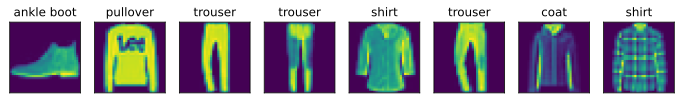

In [ ]:
@d2l.add_to_class(FashionMNIST)
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

In [ ]:
# EXERCISE
# Does reducing the batch_size (for instance, to 1) affect the reading performance?
import torch
import torchvision
from torchvision import transforms
import d2l
import time

# Instantiate FashionMNIST with batch_size=1
data_batch_1 = FashionMNIST(batch_size=1, resize=(32, 32))

# Comparison with batch_size=64
data_batch_64 = FashionMNIST(batch_size=64, resize=(32, 32))

# Test the lengths of the datasets
print(f"Number of training samples (batch_size=1): {len(data_batch_1.train)}")
print(f"Number of validation samples (batch_size=1): {len(data_batch_1.val)}")
print(f"Number of training samples (batch_size=64): {len(data_batch_64.train)}")
print(f"Number of validation samples (batch_size=64): {len(data_batch_64.val)}")

# Fetch a single batch for visualization (batch_size=1)
batch_1 = next(iter(data_batch_1.get_dataloader(train=True)))

# Timing comparison for data loading
# Batch size 1
tic = time.time()
for X, y in data_batch_1.get_dataloader(train=True):
    continue
time_batch_1 = time.time() - tic

# Batch size 64
tic = time.time()
for X, y in data_batch_64.get_dataloader(train=True):
    continue
time_batch_64 = time.time() - tic

# Print timing results
print(f'Time taken for batch_size=1: {time_batch_1:.2f} sec')
print(f'Time taken for batch_size=64: {time_batch_64:.2f} sec')

# Additional comparison on shape and data type
X_1, y_1 = batch_1
print(f'Batch size 1: X shape: {X_1.shape}, dtype: {X_1.dtype}, y shape: {y_1.shape}, dtype: {y_1.dtype}')

# Fetch a single batch for visualization (batch_size=64)
batch_64 = next(iter(data_batch_64.get_dataloader(train=True)))
X_64, y_64 = batch_64
print(f'Batch size 64: X shape: {X_64.shape}, dtype: {X_64.dtype}, y shape: {y_64.shape}, dtype: {y_64.dtype}')


# --> smaller batch generally took longer

Number of training samples (batch_size=1): 60000
Number of validation samples (batch_size=1): 10000
Number of training samples (batch_size=64): 60000
Number of validation samples (batch_size=64): 10000
Time taken for batch_size=1: 165.26 sec
Time taken for batch_size=64: 16.17 sec
Batch size 1: X shape: torch.Size([1, 1, 32, 32]), dtype: torch.float32, y shape: torch.Size([1]), dtype: torch.int64
Batch size 64: X shape: torch.Size([64, 1, 32, 32]), dtype: torch.float32, y shape: torch.Size([64]), dtype: torch.int64


In [ ]:
# The data iterator performance is important. Do you think the current implementation is fast enough? Explore various options to improve it. Use a system profiler to find out where the bottlenecks are.
import cProfile
import pstats

def profile_data_loading():
    tic = time.time()
    for X, y in data.train_dataloader():
        continue
    print(f'Data loading took: {time.time() - tic:.2f} sec')

cProfile.run('profile_data_loading()', 'data_loading_stats')
p = pstats.Stats('data_loading_stats')
p.sort_stats('cumulative').print_stats(10)  # Show the top 10 lines

# Potential improvements:
# 1. Increase num_workers for DataLoader
# 2. Use pin_memory=True for faster data transfer to GPU
# 3. Preload data into memory if it fits

Data loading took: 20.68 sec
Tue Sep 24 14:02:48 2024    data_loading_stats

         554613 function calls (549912 primitive calls) in 20.681 seconds

   Ordered by: cumulative time
   List reduced from 343 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   20.681   20.681 {built-in method builtins.exec}
        1    0.000    0.000   20.681   20.681 <string>:1(<module>)
        1    0.131    0.131   20.681   20.681 <ipython-input-160-f7744c9afb77>:5(profile_data_loading)
      939    0.021    0.000   20.298    0.022 /usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:625(__next__)
      939    0.023    0.000   19.728    0.021 /usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:1297(_next_data)
      938    0.005    0.000   19.497    0.021 /usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:1264(_get_data)
      938    0.010    0.000   19.492    0.0

**Takeaways:**
- Image read as a tensor of shape (batch size, number of channels, height, width)
- Rely on well-implemented data iterators that exploit high-performance computing to avoid slowing down training loop.

## 4.3. The Base Classification Model

In [ ]:
import torch
from d2l import torch as d2l

In [ ]:
class Classifier(d2l.Module):
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

In [ ]:
@d2l.add_to_class(d2l.Module)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)

In [ ]:
@d2l.add_to_class(Classifier)
def accuracy(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

In [ ]:
# EXERCISE
# Define L_v, L_v^q, and l_v^b
# Denote:
# - N: total number of samples
# - M: size of the last minibatch
# - L_v: total validation loss
# - L_v^q: quick and dirty estimate of validation loss
# - l_v^b: loss on the last minibatch
#
# Express L_v in terms of these variables:
def validation_loss(L_v_q, l_v_b, N, M):
    """Compute the total validation loss L_v in terms of the quick estimate and last minibatch loss."""
    # Quick estimate of total validation loss
    L_v = (L_v_q * (N - M) + l_v_b) / N  # Weighted average
    return L_v

# Example usage:
N = 1000  # Total number of samples
M = 32    # Last minibatch size
L_v_q = 0.5  # Example quick estimate of validation loss
l_v_b = 0.4  # Example loss on the last minibatch

L_v = validation_loss(L_v_q, l_v_b, N, M)
print(f"Total Validation Loss (L_v): {L_v:.4f}")

# Show that L_v^q is unbiased
# To show E[L_v] = E[L_v^q], note that:
# E[L_v] = E[(L_v^q * (N - M) + l_v^b) / N]
# Since l_v^b is the last minibatch loss, it can be viewed as independent of L_v^q in expectation.
# --> both estimates consider the same sample space.

# Example for unbiasedness
# The expectation of L_v^q over many evaluations would yield the true average loss across all validation samples.
# This is why we may still prefer using L_v because it takes the entire dataset into account.

# Optimal selection rule for multiclass classification
# Given:
# - l(y, y'): penalty of estimating y' when we see y
# - p(y | x): probability of observing y given x
#
# The expected loss for selecting y' can be expressed as:
def optimal_selection_rule(l, p, y):
    """Formulate the expected loss for selecting y'."""
    # Expected loss E[L] for estimating y' given y
    expected_loss = sum(l(y, y_prime) * p(y_prime, x) for y_prime in possible_y) # Changed '|' to ',' to pass x as an argument to p
    # Return the y' that minimizes the expected loss
    return min(possible_y, key=lambda y_prime: expected_loss)

# Example usage (hypothetical):
possible_y = [0, 1, 2]  # Possible classes
def penalty(y, y_prime):
    """Example penalty function."""
    return 1 if y != y_prime else 0  # Simple penalty: 1 if incorrect, 0 if correct

def probability(y_prime, x): # Added x as an argument
    """Example probability function (dummy values)."""
    return 0.3 if y_prime == 1 else 0.35 if y_prime == 2 else 0.35

# Compute optimal selection
optimal_y_prime = optimal_selection_rule(penalty, probability, 1)
print(f"Optimal selection of y': {optimal_y_prime}")

Total Validation Loss (L_v): 0.4844
Optimal selection of y': 0


## 4.4. Softmax Regression Implementation from Scratch

In [ ]:
import torch
from d2l import torch as d2l

In [ ]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [ ]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition

In [ ]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.2199, 0.2013, 0.2040, 0.1385, 0.2364],
         [0.1954, 0.2682, 0.1742, 0.1973, 0.1649]]),
 tensor([1.0000, 1.0000]))

In [ ]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

In [ ]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    return softmax(torch.matmul(X, self.W) + self.b)

In [ ]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [ ]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [ ]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

In [ ]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

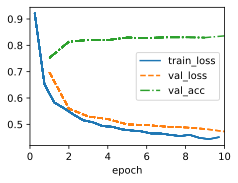

In [ ]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [ ]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

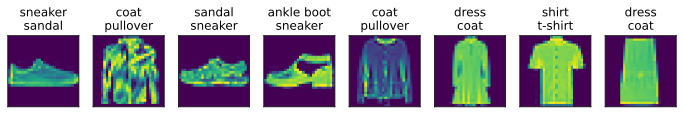

In [ ]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

In [ ]:
# EXERCISE

# Test softmax with large positive and negative values
def softmax(X):
    # Implement the fix for numerical stability by subtracting the max value
    X_exp = torch.exp(X - X.max(dim=1, keepdim=True).values)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition

# Test with a value of 100
X_large = torch.tensor([[100.0, 1.0, 0.0], [4.0, 5.0, 6.0]])
print("Softmax output for large value (100):", softmax(X_large))

# Test with values all less than -100
X_small = torch.tensor([[-101.0, -102.0, -103.0], [-104.0, -105.0, -106.0]])
print("Softmax output for small values (< -100):", softmax(X_small))

def cross_entropy(y_hat, y):
    """Cross-entropy loss function based on the definition."""
    return -torch.sum(y_hat[range(len(y_hat)), y] * torch.log(y_hat[range(len(y_hat)), y] + 1e-12)) / len(y_hat)

# Test the cross-entropy function
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
loss_value = cross_entropy(y_hat, y)
print("Cross-entropy loss:", loss_value.item())

# --> The clamping is necessary to avoid computing the log of zero.
# --> Using a more direct approach might run more slowly due to additional operations like clamping.

# Considerations on using the most likely label:
# - In sensitive areas like medical diagnosis, it's crucial to consider the entire distribution of probabilities rather than just the highest.
# - To address uncertainty, we might consider thresholding or using ensemble methods.

# Problems with a large vocabulary in softmax regression:
# - Computational cost: softmax requires computing probabilities for each class, which becomes expensive as the vocabulary grows.
# - Imbalance: Rare words might not receive enough representation in training, leading to poor predictions.


Softmax output for large value (100): tensor([[1.0000e+00, 1.0089e-43, 3.7835e-44],
        [9.0031e-02, 2.4473e-01, 6.6524e-01]])
Softmax output for small values (< -100): tensor([[0.6652, 0.2447, 0.0900],
        [0.6652, 0.2447, 0.0900]])
Cross-entropy loss: 0.2884160578250885


## 5.1. Multilayer Perceptrons

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

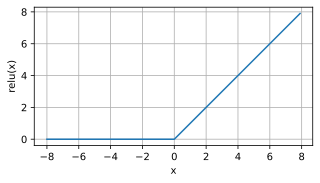

In [ ]:
# ReLU
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

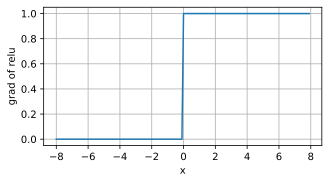

In [ ]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

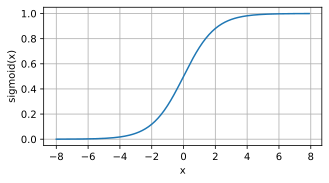

In [ ]:
# Sigmoid
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

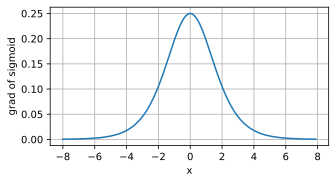

In [ ]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

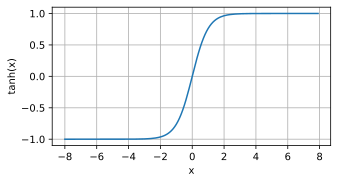

In [ ]:
#Tanh
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

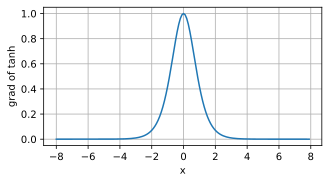

In [ ]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

**Takeaways:**
- Overcome the limitations of linear models —> hidden layers (Multilayer perceptrons (MLPs))
- Activation functions decide whether a neuron should be activated or not by calculating the weighted sum and further adding bias to it.
- Some of activation functions:
  - ReLU function retains only positive elements and discards all negative elements by setting the corresponding activations to 0.
  - Sigmoid function squashes input to interval (0, 1)
  - Tanh function squashes input to interval (-1, 1)

## 5.2. Implementation of Multilayer Perceptrons

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

In [ ]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [ ]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

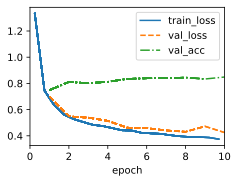

In [ ]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [ ]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))

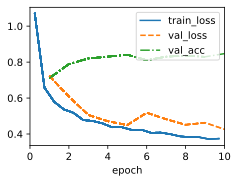

In [ ]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

## 5.3. Forward Propagation, Backward Propagation, and Computational Graphs

**Takeaways:**
- Forward propagation: calculation and storage of intermediate variables from input layer --> the output layer.
- Backpropagation: the method of calculating the gradient of neural network parameters. the method traverses the network from the output --> the input layer, according to the chain rule from calculus.
- Step in training: first forward to calculate all the variable then use it for backpropagation.